# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project analyzes data associated with movies collected from The Movie Database (TMDb) and in particular we'll be interested in finding trends on which genres are most popular from year to year and what kinds of properties are associated with movies that have high revenues
>
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>>
>>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>>
>>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
>### Questions
>1. What kinds of properties are associated with movies that have high revenues?
>2. What was the revenue change over the years?
>2. What are the most popular genres from year to year?

In [44]:
# import statements for the packages required

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties
- Accessing the data to identify any problems in quality and structure

In [6]:
# Load the data and printing out a few lines
df = pd.read_csv("tmdb-movies.csv")

In [7]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [8]:
# number of rows and columns
df.shape

(10866, 21)

- The dataset has 10866 rows and 21 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# duplicated rows
df.duplicated().sum()

1

### Data Cleaning
* __1. Drop columns and rows that contain missing values__
  * Drop all the columns that contain missing values except the genres coulmn
  _ THe genre has some rows with misssing data, we will drop them too

* __2. Drop duplicate rows__

* __3. Drop extraneous columns__
  - Dropping columns that are not relevant the questions (id, release_date)
  - Leave the original_title for film identification

- Based on the research questions not all columns are needed for analysis, most of the columns that are irrelevant fall in the bracket of those with missing values. So we will drop all columnms with missing values except the genres column

In [13]:
# Dropping columns that contain missing values except the genres column
df = df.loc[:, (-df.isnull().any()) | (df.columns.isin(['genres']))]
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
# duplicate rows
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


- The dataset contains one duplicated row, this row will be dropped

In [15]:
# dropping duplicated
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- Dropping the remaining columns that are not relevant to the research questions

In [16]:
# dropping extraneous columns
df.drop(['id', 'release_date'], axis=1, inplace=True)

- The genre column has 23 rows that have missing data. For better analysis the rows containing missing data will be dropped

In [17]:
# dropping rows with null values in the dataset
df.dropna(inplace=True)
# confirm if there are any columns in the dataset with null values
df.isnull().sum().any()

False

- Reviewing the summary statistics of the dataset

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- From the above statistics we notice that the minimum budget, runtime and revenue is zero. It doesn't make actual sense to have a movie with zero budget, runtime or reveneue.
- We therefore need to clean the invalid data

In [19]:
# cleaning invalid data
indexes = df.query('runtime == 0 | budget == 0 | revenue == 0').index
df.drop(indexes, axis=0, inplace=True)

# reviewing the statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


- The above summary statistics indicate that 0 values have been cleaned

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What kinds of properties are associated with movies that have high revenues?

- Finding the histogram of the entire dataframe

In [20]:
# printing the shape of the cleaned dataset
df.shape

(3854, 11)

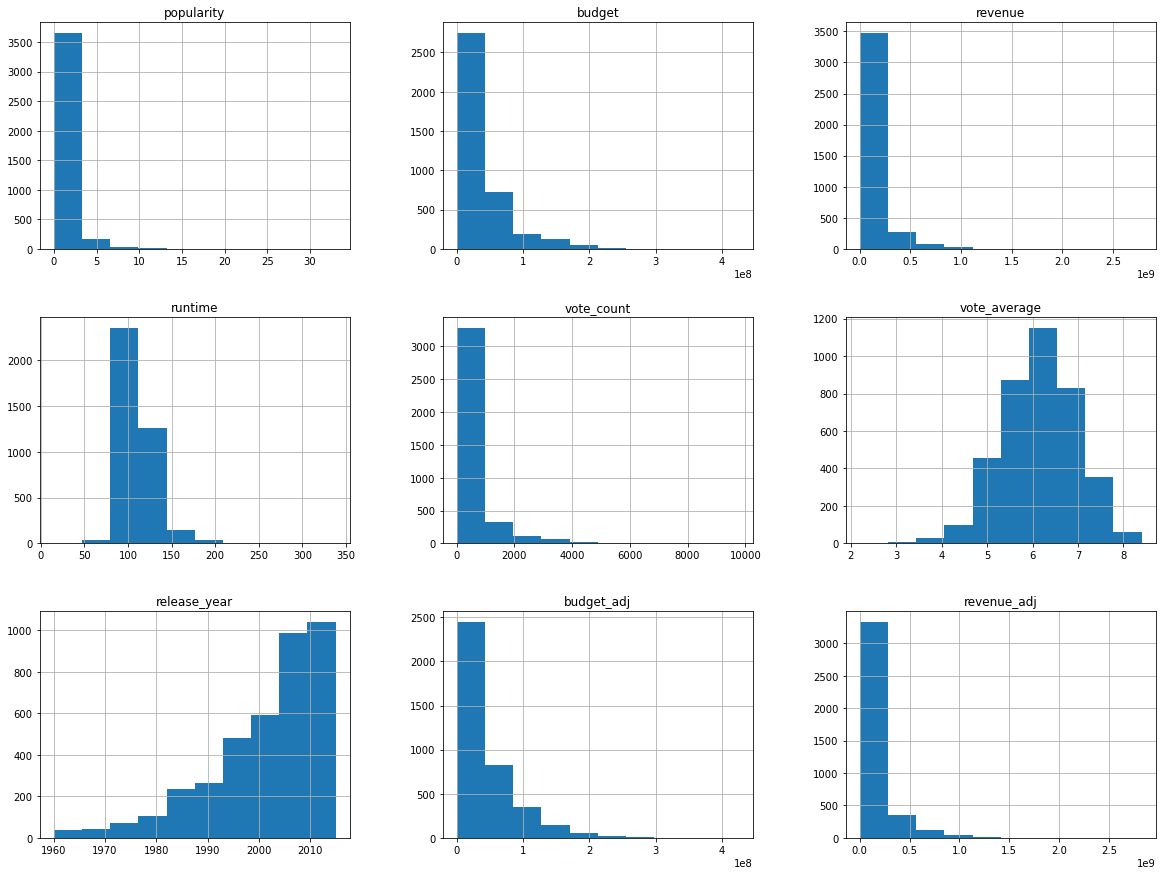

In [23]:
df.hist(figsize=(20, 15));

- From the above visualizations we notice that revenue is skewed to the right

- Finding out the summary statistics of the revenues column

In [21]:
# statistics associated with revenue
df.revenue.describe()


count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

- The first step in answering this question is to create a mask that describes what high revenue is.
- Revenue will be considered high if it surpasses the 75 percentile

In [22]:
# getting the dataframe with high revenue movies
high_revenue = df.revenue.quantile(.75)
high_revenue_movies = df[df.revenue > high_revenue]
high_revenue_movies.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


- The next step is to discover the correlation between any three independent variables againt our dependent variable which is revenue.
- **popularity**, **budget** and **vote_average** are likely to be good picks for this analysis
- To find the correlation, I've use a function that takes in two string parameters to avoid repetition

In [23]:
def correlation(x, y)-> str:
    return high_revenue_movies[[x, y]].corr()

In [24]:
# correlation between revenue and budget
# high_revenue_movies[['revenue', 'budget']].corr()
print(correlation('revenue', 'budget'))

         revenue   budget
revenue  1.00000  0.55703
budget   0.55703  1.00000


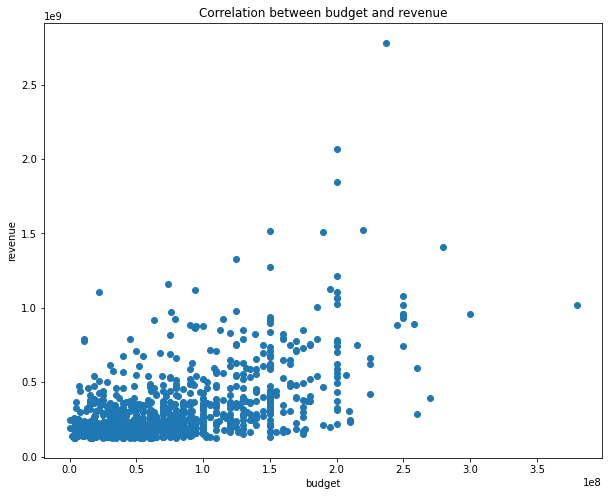

In [43]:
# visualizing the correlation on a scatter plot using matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(x=high_revenue_movies.budget, y=high_revenue_movies.revenue)
plt.title("Correlation between budget and revenue")
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show();


- There's a strong positive correlation  of 0.56 betweetn revenue and budget

In [29]:
# correlation between revenue and popularity
print(correlation('revenue', 'popularity'))

             revenue  popularity
revenue     1.000000    0.511673
popularity  0.511673    1.000000


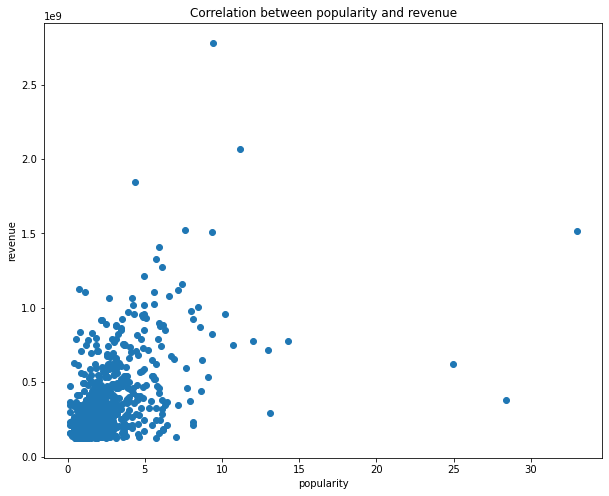

In [42]:
# visualizing the correlation between revenue and popularity on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x=high_revenue_movies.popularity, y=high_revenue_movies.revenue)
plt.title("Correlation between popularity and revenue")
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.show();


- The correlation between revenue and popularity has a positive value of 0.51

In [30]:
# correlation between revenue and vote_average
print(correlation('revenue', 'vote_average'))

               revenue  vote_average
revenue       1.000000      0.297338
vote_average  0.297338      1.000000


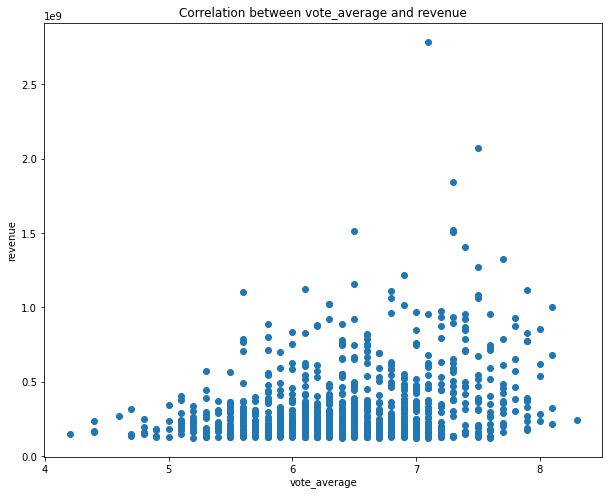

In [41]:
# visualizing the correlation of revenue and vote_average
plt.figure(figsize=(10, 8))
plt.scatter(x=high_revenue_movies.vote_average, y=high_revenue_movies.revenue)
plt.title("Correlation between vote_average and revenue")
plt.xlabel("vote_average")
plt.ylabel("revenue")
plt.show();


- The correlation between vote_average and revenue is relatively low with a positive value of 0.3

- On an overall scale the indication is that revenue is strongly associated with a higher budget and a high popularity rate and less associated with the vote_average

### Research Question 2: What was the revenue change over the years?
- Compare the change in revenue in different years. We first aggregate them into decades since there are too many years

- Let's first start by finding the change of revenue over years and the distribution

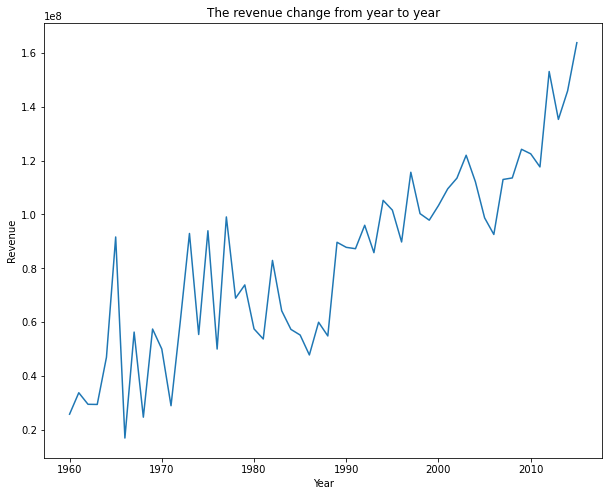

In [36]:
# Draw the line char for the change of the revenue
revenues = df.groupby('release_year')['revenue'].mean()
plt.figure(figsize=(10, 8))
plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show();


- The line chart above clearly indicates that there was a drastic change in revenue over the years especially in the 60's. It however shows an increasing trend from an overall perspective

In [37]:
# aggregating years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df.release_year, bins=bin_edges, labels=bin_names)
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s


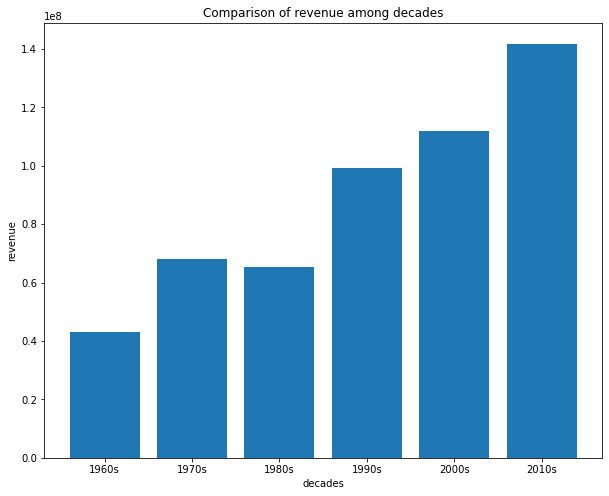

In [40]:
# bar graph to compare revenue in different decdades
# df.groupby('decade').revenue.sum().plot(kind='bar')
rev_distribution = df.groupby('decade').revenue.mean()
plt.figure(figsize=(10, 8))
plt.bar(rev_distribution.index, rev_distribution.values)
plt.title("Comparison of revenue among decades")
plt.xlabel("decades")
plt.ylabel("revenue")
plt.show()


- In the above visualization, revenue increased over the years with the 2010s being the highest

### Research Question 3: What are the most popular genres from year to year?

- The best approach is to first extract the most relevant columns associated with these question

In [45]:
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head(3)

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507


- We then split the rows with more than one genre into different rows

In [46]:
# splitting the genres column into multiple columns
df_genres.genres = df_genres.genres.str.split('|')

In [47]:
# creating each row for each gen using explode
df_genres = df_genres.explode('genres')

In [48]:
print(df_genres.shape)
df_genres.head()

(10303, 3)


,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


- After splitting we need to select the most popular genres for each year

In [49]:
# groupby year and get the largest value
data = df_genres.groupby(['release_year', 'genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

In [50]:
# removing extra row index by reset index
data = data.reset_index(level=0, drop=True)

In [51]:
# changing the pandas series into a pandas dataframe
df_genres = data.reset_index()
df_genres.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1961,Animation,2.631987
2,1962,Thriller,3.170651
3,1963,Adventure,1.586280
4,1964,Action,3.153791


- Visualize a scatter plot to show the most popular genre over the year

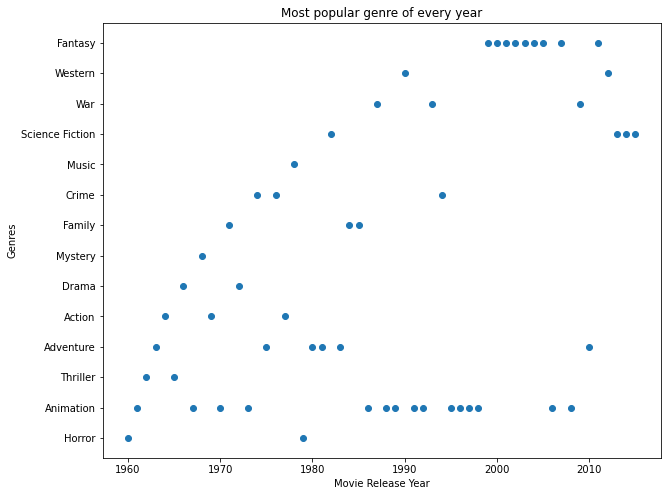

In [53]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df_genres.release_year, y=df_genres.genres)
plt.title("Most popular genre of every year")
plt.xlabel("Movie Release Year")
plt.ylabel("Genres")
plt.show();


In [54]:
# genres summary by popularity
df_genres.genres.value_counts()

Animation          15
Fantasy             9
Adventure           6
Science Fiction     4
Action              3
Family              3
Crime               3
War                 3
Horror              2
Thriller            2
Drama               2
Western             2
Mystery             1
Music               1
Name: genres, dtype: int64

- From the scatterplot and summary statistics there is no one particular genre that constantly dominated
- From an overall lense the most popular genre in the 90s is animation, it changes to fantasy in the 2000s

* Using a piechart to show the percentage of each genre

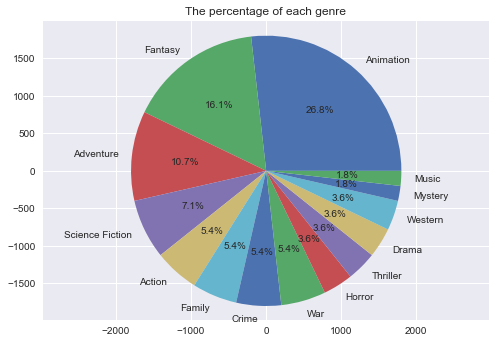

In [77]:
# Draw the pie chart of genres
sizes = df_genres.genres.value_counts().values
labels = df_genres.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', radius=1800, frame=True)
ax1.axis('equal')
plt.style.use("seaborn")
plt.title('The percentage of each genre')
plt.show()


<a id='conclusions'></a>
## Conclusions
- From the above analysis, high revenue movies show a strong positive correlation with budget and popularity and a weak correlation with vote_average
- There was an overall increase in revenue over the years with the 2010s period being the highest while the 1960s being the lowest
- The most popular genre of the movie changed over the year, though there is stability in some periods. Over the year, animation, fantasy, and adventure account for a large proportion of the most popular genre

> ### Limitations
>> * Alot of cleaning has been done on the data with the rows dropping from  10866 to 3854. This change resulted from dropping null values and duplicates
>> * There were rows with minimum values of zero in the budget and runtime columns which had to be removed
>> * Almost every movie has multiple genres, I split them and included them in the analysis


### References
1. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
2. https://praxitelisk.github.io/DAND-P1-Investigate-a-Dataset/Investigate_a_Dataset.html